# Machine Learning with Scikit-learn
![Machine Learning Flow](https://hackernoon.com/hn-images/1*oU3LAye3LxFcHg0UePmbSA.png)

[![scikit-learn](https://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png)](https://scikit-learn.org)

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use(['seaborn-darkgrid', 'seaborn-notebook'])

> - In machine learning, the process of fitting a model or an algorithm to observed data is known as *training*.
> - Machine-learning applications can often be classified into either of two types: *supervised* and *unsupervised learning*.
>   - In *supervised learning*, the data includes feature variables and known response variables.
>   - In contrast, *unsupervised learning* corresponds to situations where machine-learning applications are trained with raw data that is not labeled or otherwise manually prepared.

Supervised Learning
===================
Regression
----------

In [4]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)
print(f"{X_all = }\n{y_all = }")

X_all = array([[ 0.1569635 ,  0.40037239, -0.80990621, ...,  0.84114705,
        -0.86800801,  0.76415393],
       [ 0.51997243, -0.37558057,  0.1708136 , ...,  0.1856506 ,
        -0.99401755,  0.79985506],
       [-0.72950687, -0.66251638,  0.09817473, ...,  1.10852902,
         0.29771803, -0.54120507],
       ...,
       [-1.61518407,  0.90693126,  0.82258629, ..., -0.10999784,
        -0.98411853,  1.33769812],
       [-0.52349125, -0.49463664,  0.40395409, ...,  0.98801554,
         0.35038894,  0.49011511],
       [ 1.21360249,  1.09175108,  1.5400607 , ..., -1.45148402,
         2.00300877, -0.60382504]])
y_all = array([ 125.1530957 ,  118.10960646,   78.0042549 , -101.13253428,
        115.17822749, -258.53188967,   44.91670447,   26.19772572,
        -16.37661153,   32.73589498,   30.41905752,   83.29265481,
        -24.99217404, -153.14816845,  335.31701317,   54.18947212,
         53.6746647 ,  -21.15489566,   91.60110953,   97.74213747,
       -136.85030239,  -75.91640888,

In [5]:
print(f"{X_all.shape = }\n{y_all.shape = }")

X_all.shape = (50, 50)
y_all.shape = (50,)


In [6]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_all, y_all, train_size=0.5)

### Linear regression
$$
\min_\beta \lVert X \beta - y \rVert_2^2
$$
where $X$ is the feature matreix, $y$ the response variables, and $\beta$ the vector of model parameters and where $\lVert \cdot \rVert_2$ denotes the $L_2$ norm.

In [7]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
def sse(resid):
    """return the sum of squared errors"""
    return np.sum(resid**2)

In [9]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print(f"{sse_train = }\n{sse_test  = }")

sse_train = 4.7288740280016685e-25
sse_test  = 317319.5259783005


In [10]:
print(f"{model.score(X_train, y_train) = }\n{model.score(X_test,  y_test) = }")

model.score(X_train, y_train) = 1.0
model.score(X_test,  y_test) = 0.3180866134839754


In [11]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

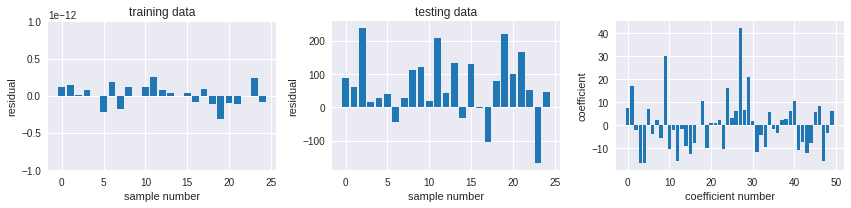

In [12]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

### Regularized regression
- LASSO regression
$$
\min_\beta \left\{ \lVert X \beta - y \rVert_2^2 + \alpha \lVert \beta \rVert_1 \right\}
$$
- Ridge regression
$$
\min_\beta \left\{ \lVert X \beta - y \rVert_2^2 + \alpha \lVert \beta \rVert_2^2 \right\}
$$
- Elastic-net regularization
$$
\min_\beta \left\{ \lVert X \beta - y \rVert_2^2 + \alpha \rho \lVert \beta \rVert_1 + \alpha(1 - \rho) \lVert \beta \rVert_2^2 \right\}
$$

#### Ridge regression

In [13]:
# Assign the model
model = linear_model.Ridge(alpha=2.5)
# Train the model
model.fit(X_train, y_train)

# Estimate the trained model
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print(f"{sse_train = }\n{sse_test  = }")

sse_train = 1186.9722938416987
sse_test  = 306745.1488750923


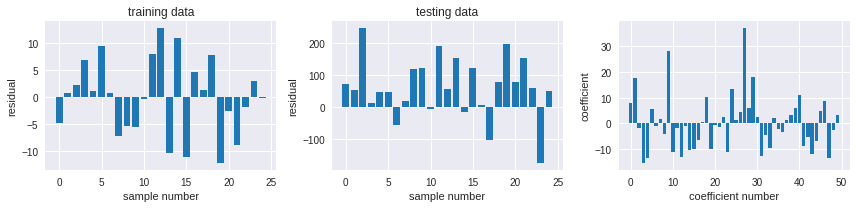

In [14]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

#### LASSO regression

In [15]:
# Assign the model
model = linear_model.Lasso(alpha=1.0)
# Train the model
model.fit(X_train, y_train)

# Estimate the trained model
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print(f"{sse_train = }\n{sse_test  = }")

sse_train = 733.5688023904441
sse_test  = 56164.12031604733


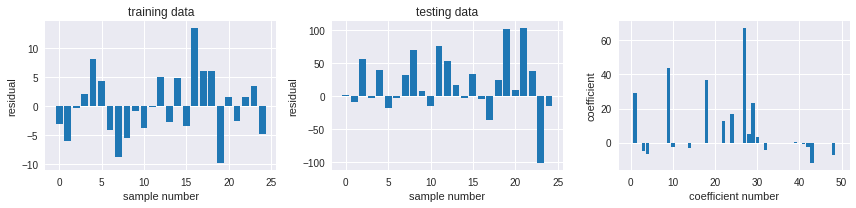

In [16]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

How do the regression model parameters and the SSE for the training and testing datasets depend on the value of α for a specific problem?

In [17]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

Text(0, 0.5, 'sse')

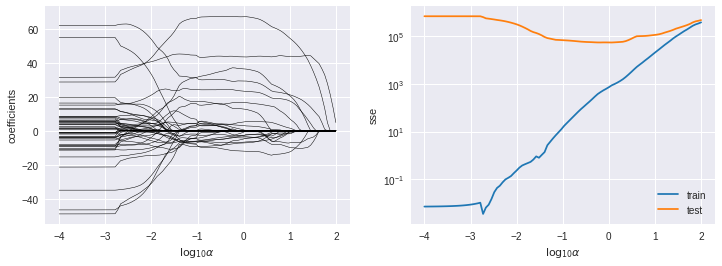

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color="k", lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend()

axes[0].set_xlabel(r"$\log_{10} \alpha$")
axes[0].set_ylabel(r"coefficients")
axes[1].set_xlabel(r"$\log_{10} \alpha$")
axes[1].set_ylabel("sse")

##### Cross-Validation
> Testing several values of $\alpha$ automatically

In [19]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)
model.alpha_

0.09329461864814079

In [20]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print(f"{sse_train = }\n{sse_test  = }")

sse_train = 3.4667328082041187
sse_test  = 4.529302859928596


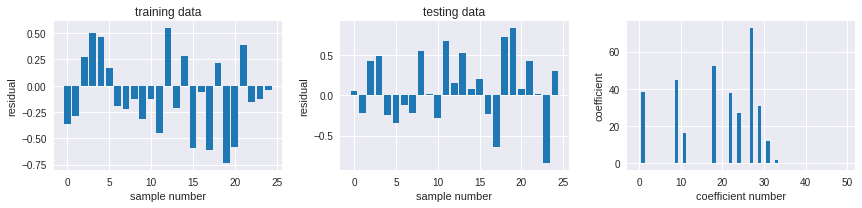

In [21]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

#### Elastic-net regularization

In [22]:
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)
model.alpha_, model.l1_ratio

(0.21452057034727032, 0.5)

In [23]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print(f"{sse_train = }\n{sse_test  = }")

sse_train = 1493.5492229373156
sse_test  = 296927.455940156


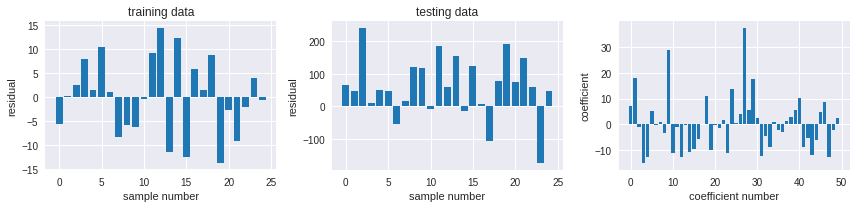

In [24]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

Classification
--------------
- logistic regression
- nearest neighbor method
- support vector machine
- decision tree
- Random Forest method
- ...

In [25]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [26]:
print(f"{iris.target_names = }\n{iris.target.shape = }")

iris.target_names = array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
iris.target.shape = (150,)


![Iris: sepal and petal](https://thegoodpython.com/assets/images/iris-species.png)

In [27]:
print(f"{iris.feature_names = }\n{iris.data.shape = }")

iris.feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.data.shape = (150, 4)


In [28]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

### Logistic regression

In [29]:
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In the *confusion matrix*, the element $C_{ij}$ corresponds to the number of samples of category $i$ that were categorized as $j$.

In [30]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 11]])

In [31]:
np.bincount(y_test)

array([19, 14, 12])

### Desicision Tree

In [32]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 11]])

In [33]:
train_size_vec = np.linspace(0.1, 0.9, 30)
classifiers = [
    tree.DecisionTreeClassifier,
    neighbors.KNeighborsClassifier,
    svm.SVC,
    ensemble.RandomForestClassifier
]
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target,
                                         train_size=train_size)
    for m, Classifier in enumerate(classifiers):
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_p).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

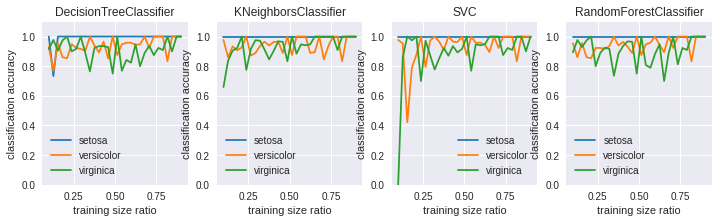

In [34]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers):
    for l in range(len(iris.target_names)):
        axes[m].plot(train_size_vec, cm_diags[l, :, m], label=iris.target_names[l])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend()

Unsupervised Learning
=====================
- K-means
- mean-shift
- ...

In [35]:
X, y = iris.data, iris.target
n_clusters = 3
clustering = cluster.KMeans(n_clusters=n_clusters)
clustering.fit(X)

y_pred = clustering.predict(X)
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [36]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [37]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = eval(input("index of 0, 1, 2 in y_pred:\n"))
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [38]:
y[idx_1], y[idx_2]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [39]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

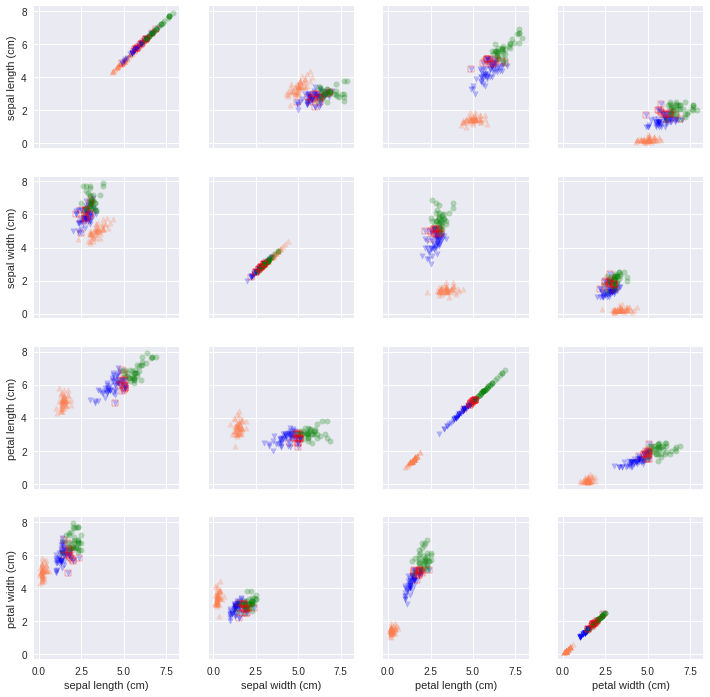

In [40]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]

for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30, marker=markers[p], color=colors[p], alpha=0.25)
        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n], s=30, marker="s", edgecolor="red", facecolor=(1, 1, 1, 0))
            axes[N-1, m].set_xlabel(iris.feature_names[m])
            axes[m, 0].set_ylabel(iris.feature_names[m])